In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question Number 1 : Data Understanding and Preparation:

In [ ]:
part1 = pd.read_csv('Part2+-+Data1.csv')
part2 = pd.read_csv('Part2+-Data2.csv')
part1.head(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [ ]:
part2.head(5)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [ ]:
print("Part 1 Data Shape :  \n",part1.shape)
print("\n Part 1 Data Columns \n",part1.columns)
print("\n Part 1 Data Datatypes \n",part1.dtypes)

Part 1 Data Shape :  
 (5000, 8)

 Part 1 Data Columns 
 Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

 Part 1 Data Datatypes 
 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


In [ ]:
print("Part 2 Data Shape :  \n",part2.shape)
print("\n Part 2 Data Columns \n",part2.columns)
print("\n Part 2 Data Datatypes \n",part2.dtypes)

Part 2 Data Shape :  
 (5000, 7)

 Part 2 Data Columns 
 Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

 Part 2 Data Datatypes 
 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [ ]:
merge_df = pd.merge(part1, part2, on='ID')
merge_df.head(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [ ]:
merge_df[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']] = merge_df[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']].astype('object')

In [ ]:
merge_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

# Question 2 : Data Exploration and Analysis

In [ ]:
merge_df['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [ ]:
merge_df['LoanOnCard'].isnull().sum()

20

In [ ]:
merge_df.shape

(5000, 14)

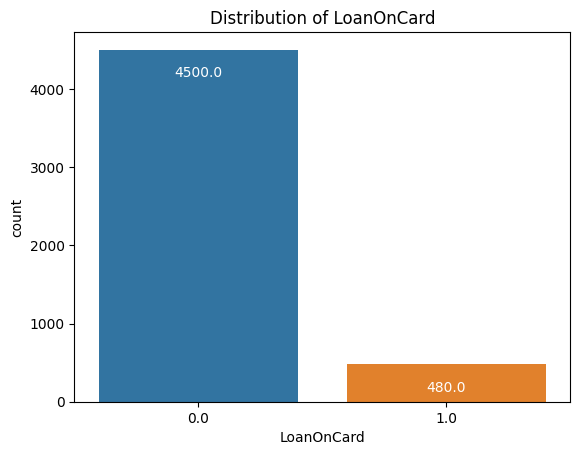

In [ ]:
ax = sns.countplot(data=merge_df, x='LoanOnCard')

plt.title("Distribution of LoanOnCard")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=10)

# Insights 
1. Majority of the data has 0 in LoanOnCard. That means majority does not have loan on their account. 
2. 20 dataset does not have value on LoanOnCard. So this above visualization is for rest of the people (5000 - 20) = 4980 datas.

In [ ]:
merge_df['LoanOnCard'].isnull().sum()

20

In [ ]:
corr = merge_df.corr()['LoanOnCard']
print(corr)

ID                    -0.027188
Age                   -0.008147
CustomerSince         -0.007801
HighestSpend           0.502626
ZipCode                0.000120
MonthlyAverageSpend    0.366912
Mortgage               0.141947
LoanOnCard             1.000000
Name: LoanOnCard, dtype: float64


In [ ]:
merge_df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [ ]:
#adding mode value to nan in column LoanOnCard
mode_loanoncard = merge_df.groupby('HighestSpend')['LoanOnCard'].apply(lambda x: x.mode()[0])
merge_df['LoanOnCard'] = merge_df.groupby('HighestSpend')['LoanOnCard'].apply(lambda x: x.fillna(mode_loanoncard[x.name]))

In [ ]:
merge_df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [ ]:
merge_df['LoanOnCard'].value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

In [ ]:
col = merge_df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Data: \n",col)

Categorical Data: 
 ['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']


In [ ]:
merge_df['HiddenScore'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64

In [ ]:
#checking unusual values in the categorical columns
for i in col :
  print("\n", i, "\n")
  print(merge_df[i].value_counts())


 HiddenScore 

1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64

 Level 

1    2096
3    1501
2    1403
Name: Level, dtype: int64

 Security 

0    4478
1     522
Name: Security, dtype: int64

 FixedDepositAccount 

0    4698
1     302
Name: FixedDepositAccount, dtype: int64

 InternetBanking 

1    2984
0    2016
Name: InternetBanking, dtype: int64

 CreditCard 

0    3530
1    1470
Name: CreditCard, dtype: int64


# Insights about unsual values in categorical data
does not look like here is any unusual values.

#Using dummy for logistic classification as dataset

In [ ]:
dummy = merge_df

In [ ]:
dummy.drop(['ID', 'ZipCode'], axis= 1 )

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,0.0
1,45,19,34,3,1.5,1,0,1,0,0,0,0.0
2,39,15,11,1,1.0,1,0,0,0,0,0,0.0
3,35,9,100,1,2.7,2,0,0,0,0,0,0.0
4,35,8,45,4,1.0,2,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0.0


# Question 3 : Data Preparation and model building

In [ ]:
X = dummy.drop(['LoanOnCard'], axis=1) 
y = dummy['LoanOnCard']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
lr.score(X_test_scaled, y_test)

0.9512

In [ ]:
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1116
         1.0       0.86      0.65      0.74       134

    accuracy                           0.95      1250
   macro avg       0.91      0.82      0.86      1250
weighted avg       0.95      0.95      0.95      1250



In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9512
Precision: 0.8613861386138614
Recall: 0.6492537313432836
F1-score: 0.7404255319148937


#Insights about Model
1. The. logistic classification model has an accuracy score of 0.9512. It means it can correctly classified 95.12% of the observations in the test set.
2. The precision score of 0.8614 means when the model predicts a positive class, it is correct 86.14% of the time.
3. The recall score of 0.6493 means  the model can identify 64.93% of the true positive cases in the test set.
4. F1-score = 0.7404 which means this model has a good balance between precision and recall (higher values indicating better performance). It suggests that this model is able to classify positive and negative instances with reasonable accuracy.
5. Based on these metrics, we can conclude that the model has a high accuracy and precision but a relatively lower recall. This indicates that the model may perform well in predicting the negative cases, but may miss some of the positive cases.